# Case Study - World Happiness Analysis Project

## Table of Contents

1. Importing Libraries
2. Import Data - 2015 Data
3. Data Consistency Check - 2015 Data
4. Data Preparation for Regression Analysis
* a. happiness_score_2015 vs economy_gdp_2015
* b. happiness_score_2015 vs family_2015
* c. happiness_score_2015 vs health_life_expectancy_2015
* d. happiness_score_2015 vs freedom_2015
* e. happiness_score_2015 vs trust_2015
* f. happiness_score_2015 vs generosity_2015
* g. happiness_score_2015 vs dystopia_residual_2015
5. Regression Analysis
* a. happiness_score_2015 vs economy_gdp_2015
* b. happiness_score_2015 vs family_2015
* c. happiness_score_2015 vs health_life_expectancy_2015
* d. happiness_score_2015 vs freedom_2015
* e. happiness_score_2015 vs trust_2015
* f. happiness_score_2015 vs generosity_2015
* g. happiness_score_2015 vs dystopia_residual_2015

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures the charts created  are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02a. Importing Data

In [3]:
# Path & list setup
path = r'/Users/ChuahLH/Desktop/Data Science/Data Immersion/Achievement 6/World Happiness Analysis'

In [4]:
# Import 2015.csv dataset into notebook using the os library and the vars_list
df_2015 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2015_clean_data.csv'), index_col = False)

In [5]:
df_2015.head()

,Unnamed: 0,Country,Region,happiness_rank_2015,happiness_score_2015,standard_error_2015,economy_gdp_2015,family_2015,health_life_expectancy_2015,freedom_2015,trust_2015,generosity_2015,dystopia_residual_2015
0,0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
# Drop the redundant columns
df_2015 = df_2015.drop(['Unnamed: 0'],axis = 1)

In [7]:
df_2015.shape

(158, 12)

In [8]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      158 non-null    object 
 1   Region                       158 non-null    object 
 2   happiness_rank_2015          158 non-null    int64  
 3   happiness_score_2015         158 non-null    float64
 4   standard_error_2015          158 non-null    float64
 5   economy_gdp_2015             158 non-null    float64
 6   family_2015                  158 non-null    float64
 7   health_life_expectancy_2015  158 non-null    float64
 8   freedom_2015                 158 non-null    float64
 9   trust_2015                   158 non-null    float64
 10  generosity_2015              158 non-null    float64
 11  dystopia_residual_2015       158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


# 03a. Data Consistency Check - 2015 Data

In [9]:
# check for missing values
df_2015.isnull().sum()

Country                        0
Region                         0
happiness_rank_2015            0
happiness_score_2015           0
standard_error_2015            0
economy_gdp_2015               0
family_2015                    0
health_life_expectancy_2015    0
freedom_2015                   0
trust_2015                     0
generosity_2015                0
dystopia_residual_2015         0
dtype: int64

Confirmed no missing values

In [10]:
# Finding Duplicates
df_dups_2015 = df_2015[df_2015.duplicated()]

In [11]:
df_dups_2015

,Country,Region,happiness_rank_2015,happiness_score_2015,standard_error_2015,economy_gdp_2015,family_2015,health_life_expectancy_2015,freedom_2015,trust_2015,generosity_2015,dystopia_residual_2015


Confirmed no duplicated values.

In [12]:
df_2015.describe()

,happiness_rank_2015,happiness_score_2015,standard_error_2015,economy_gdp_2015,family_2015,health_life_expectancy_2015,freedom_2015,trust_2015,generosity_2015,dystopia_residual_2015
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# 04a. Data Preparation for Regression Analysis - 2015 Data

### happiness_score_2015 vs economy_gdp_2015

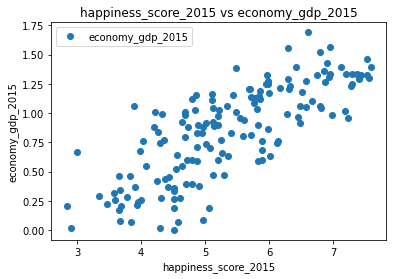

In [18]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2015.plot(x = 'happiness_score_2015', y='economy_gdp_2015',style='o')
plt.title('happiness_score_2015 vs economy_gdp_2015')  
plt.xlabel('happiness_score_2015')  
plt.ylabel('economy_gdp_2015')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2015['happiness_score_2015'].values.reshape(-1,1)
y = df_2015['economy_gdp_2015'].values.reshape(-1,1)

In [20]:
X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [21]:
y

array([[1.39651],
       [1.30232],
       [1.32548],
       [1.459  ],
       [1.32629],
       [1.29025],
       [1.32944],
       [1.33171],
       [1.25018],
       [1.33358],
       [1.22857],
       [0.95578],
       [1.33723],
       [1.02054],
       [1.39451],
       [0.98124],
       [1.56391],
       [1.33596],
       [1.30782],
       [1.42727],
       [1.26637],
       [1.36011],
       [1.04424],
       [1.52186],
       [1.06353],
       [1.32792],
       [1.10715],
       [1.69042],
       [1.27778],
       [1.05351],
       [1.17898],
       [1.06166],
       [0.91861],
       [0.9669 ],
       [1.39541],
       [1.23011],
       [1.2074 ],
       [1.29098],
       [1.55422],
       [0.99534],
       [1.21183],
       [0.76454],
       [0.74553],
       [0.63244],
       [1.16891],
       [1.27074],
       [1.24461],
       [0.86402],
       [1.32376],
       [1.25114],
       [0.68133],
       [0.59448],
       [0.75985],
       [1.12254],
       [1.18498],
       [1.

In [22]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05a. Regression Analysis - 2015 Data

### happiness_score_2015 vs economy_gdp_2015

In [23]:
# create a regression object

regression = LinearRegression()

In [24]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

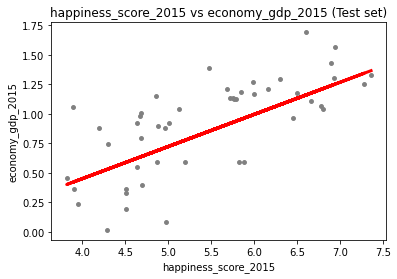

In [26]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs economy_gdp_2015 (Test set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('economy_gdp_2015')
plot_test.show()

In [27]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [28]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.27201483]]
Mean squared error:  0.08374510845422435
R2 score:  0.4620514407950941


The plot (test model) shows a positive relationship, so the coefficient is positive (0.272). The slope means that as happiness_score_2015 rises, as well as the economy_gdp_2015 rises too. In this case, the MSE shows 0.083, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of econogmy_gdp_2015 to happiness_score_2015. The R2 is 46.2 percent, which the data isn't fit that great. 

In [29]:
y_predicted

array([[1.36577436],
       [0.99338605],
       [0.62290186],
       [0.59053209],
       [0.91749392],
       [0.58862799],
       [0.58998806],
       [0.43874782],
       [0.63731864],
       [0.7246354 ],
       [1.20854979],
       [0.42460304],
       [1.17699606],
       [0.93218272],
       [0.77550218],
       [0.69144959],
       [0.53150487],
       [0.68900146],
       [0.42242693],
       [0.94795958],
       [0.99120994],
       [1.11851288],
       [0.93789503],
       [1.3445572 ],
       [1.04044462],
       [1.07580655],
       [0.68383318],
       [1.23983149],
       [0.40148178],
       [0.63949476],
       [0.96455248],
       [0.95339987],
       [1.25207216],
       [0.5301448 ],
       [0.50348734],
       [1.21507814],
       [0.71484287],
       [0.91014952],
       [0.62534999],
       [0.71157869],
       [1.16094719],
       [0.63487051],
       [0.63595857],
       [0.75646114],
       [1.24962402],
       [0.92783048],
       [1.13211362],
       [0.851

In [30]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.33171,1.365774
1,1.16891,0.993386
2,0.54558,0.622902
3,0.35997,0.590532
4,1.13764,0.917494
5,0.33024,0.588628
6,0.19073,0.589988
7,0.23906,0.438748
8,1.00880,0.637319
9,0.91851,0.724635


In [31]:
# predict

y_predicted_train = regression.predict(X_train) 

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.27201483]]
Mean squared error:  0.054596912711777565
R2 score:  0.6613317055208154


The plot (train model) shows a positive relationship, so the coefficient is positive (0.272). The slope means that as happiness_score_2015 rises, as well as the economy_gdp_2015 rises too. In this case, the MSE shows 0.054, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of econogmy_gdp_2015 to happiness_score_2015. The R2 is 66.1 percent, which the data isn't fit that great.

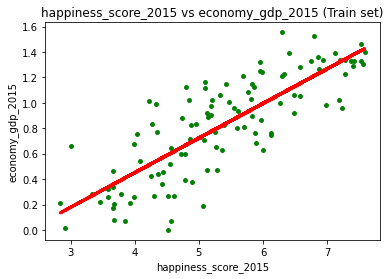

In [34]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs economy_gdp_2015 (Train set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('economy_gdp_2015')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE being even larger on the train set. The R2 is higher in train set compared to test set. 

# 04b. Data Preparation for Regression Analysis - 2015 Data

### happiness_score_2015 vs family_2015

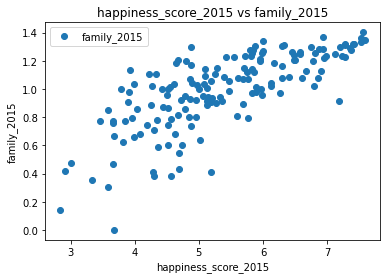

In [35]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2015.plot(x = 'happiness_score_2015', y='family_2015',style='o')
plt.title('happiness_score_2015 vs family_2015')  
plt.xlabel('happiness_score_2015')  
plt.ylabel('family_2015')  
plt.show()

In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2015['happiness_score_2015'].values.reshape(-1,1)
y = df_2015['family_2015'].values.reshape(-1,1)

In [37]:
X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [38]:
y

array([[1.34951],
       [1.40223],
       [1.36058],
       [1.33095],
       [1.32261],
       [1.31826],
       [1.28017],
       [1.28907],
       [1.31967],
       [1.30923],
       [1.22393],
       [1.23788],
       [1.29704],
       [0.91451],
       [1.24711],
       [1.23287],
       [1.21963],
       [1.36948],
       [1.28566],
       [1.12575],
       [1.28548],
       [1.08182],
       [1.25596],
       [1.02   ],
       [1.1985 ],
       [1.29937],
       [1.12447],
       [1.0786 ],
       [1.26038],
       [1.24823],
       [1.20643],
       [1.2089 ],
       [1.24018],
       [1.26504],
       [1.08393],
       [1.31379],
       [1.30203],
       [1.07617],
       [1.16594],
       [0.972  ],
       [1.18354],
       [1.02507],
       [1.04356],
       [1.34043],
       [1.26999],
       [1.25712],
       [0.95774],
       [0.99903],
       [1.21624],
       [1.19777],
       [0.97841],
       [1.01528],
       [1.30477],
       [1.12241],
       [1.27385],
       [1.

In [39]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05b. Regression Analysis - 2015 Data

### happiness_score_2015 vs family_2015

In [40]:
# create a regression object

regression = LinearRegression()

In [41]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

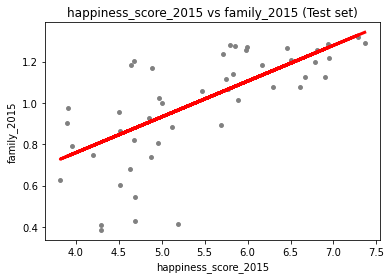

In [43]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs family_2015 (Test set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('family_2015')
plot_test.show()

In [44]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [45]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17312453]]
Mean squared error:  0.036954919223305474
R2 score:  0.4783311718031774


The plot (test model) shows a positive relationship, so the coefficient is positive (0.173). The slope means that as happiness_score_2015 rises, as well as the family_2015 rises too. In this case, the MSE shows 0.036, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of family_2015 to happiness_score_2015. The R2 is 47.8 percent, which the data isn't fit that great.

In [46]:
y_predicted

array([[1.34236994],
       [1.10536246],
       [0.86956685],
       [0.84896503],
       [1.05706072],
       [0.84775316],
       [0.84861878],
       [0.75236155],
       [0.87874245],
       [0.93431543],
       [1.24230397],
       [0.74335907],
       [1.22222152],
       [1.06640944],
       [0.96668971],
       [0.91319423],
       [0.81139701],
       [0.91163611],
       [0.74197407],
       [1.07645067],
       [1.10397747],
       [1.18499975],
       [1.07004506],
       [1.32886623],
       [1.13531301],
       [1.1578192 ],
       [0.90834675],
       [1.26221329],
       [0.72864348],
       [0.88012745],
       [1.08701126],
       [1.07991316],
       [1.27000389],
       [0.81053139],
       [0.79356518],
       [1.24645895],
       [0.92808294],
       [1.05238636],
       [0.87112497],
       [0.92600545],
       [1.21200717],
       [0.87718433],
       [0.87787683],
       [0.954571  ],
       [1.26844577],
       [1.06363945],
       [1.19365597],
       [1.015

In [47]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.28907,1.342370
1,1.26999,1.105362
2,0.67954,0.869567
3,0.86449,0.848965
4,1.23617,1.057061
5,0.95571,0.847753
6,0.60406,0.848619
7,0.79273,0.752362
8,0.54447,0.878742
9,1.00232,0.934315


In [48]:
# predict

y_predicted_train = regression.predict(X_train) 

In [49]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [50]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17312453]]
Mean squared error:  0.031770316283925494
R2 score:  0.5761500130164565


The plot (train model) shows a positive relationship, so the coefficient is positive (0.173). The slope means that as happiness_score_2015 rises, as well as the family_2015 rises too. In this case, the MSE shows 0.032, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of family_2015 to happiness_score_2015. The R2 is 57.6 percent, which the data isn't fit that great.

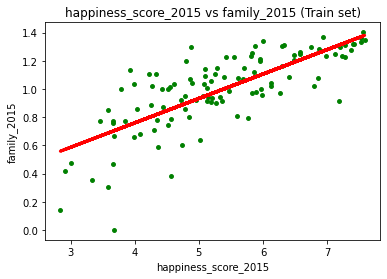

In [51]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs family_2015 (Train set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('family_2015')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set. 

# 04c. Data Preparation for Regression Analysis - 2015 Data

### happiness_score_2015 vs health_life_expectancy_2015

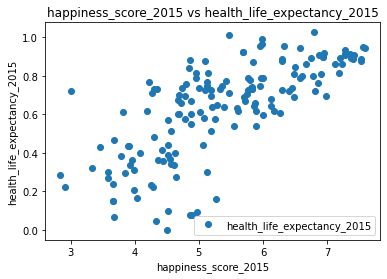

In [52]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2015.plot(x ='happiness_score_2015', y='health_life_expectancy_2015',style='o')
plt.title('happiness_score_2015 vs health_life_expectancy_2015')  
plt.xlabel('happiness_score_2015')  
plt.ylabel('health_life_expectancy_2015')  
plt.show()

In [53]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2015['happiness_score_2015'].values.reshape(-1,1)
y = df_2015['health_life_expectancy_2015'].values.reshape(-1,1)

In [54]:
X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [55]:
y

array([[0.94143],
       [0.94784],
       [0.87464],
       [0.88521],
       [0.90563],
       [0.88911],
       [0.89284],
       [0.91087],
       [0.90837],
       [0.93156],
       [0.91387],
       [0.86027],
       [0.89042],
       [0.81444],
       [0.86179],
       [0.69702],
       [0.91894],
       [0.89533],
       [0.89667],
       [0.80925],
       [0.90943],
       [0.76276],
       [0.72052],
       [1.02525],
       [0.79661],
       [0.89186],
       [0.85857],
       [0.79733],
       [0.94579],
       [0.78723],
       [0.84483],
       [0.8116 ],
       [0.69077],
       [0.7385 ],
       [0.72025],
       [0.95562],
       [0.88721],
       [0.8753 ],
       [0.72492],
       [0.6082 ],
       [0.61483],
       [0.67737],
       [0.64425],
       [0.59772],
       [0.78902],
       [0.99111],
       [0.96538],
       [0.79075],
       [0.74716],
       [0.95446],
       [0.5392 ],
       [0.61826],
       [0.66098],
       [0.64368],
       [0.87337],
       [0.

In [56]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05c. Regression Analysis - 2015 Data

### happiness_score_2015 vs health_life_expectancy_2015

In [57]:
# create a regression object

regression = LinearRegression()

In [58]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [59]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

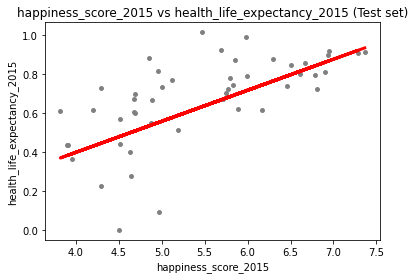

In [60]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs health_life_expectancy_2015 (Test set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('health_life_expectancy_2015')
plot_test.show()

In [61]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [62]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.15912339]]
Mean squared error:  0.03143325054084178
R2 score:  0.3652826042167152


The plot (test model) shows a positive relationship, so the coefficient is positive (0.159). The slope means that as happiness_score_2015 rises, as well as the health_life_expectancy_2015 rises too. In this case, the MSE shows 0.031, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of health_life_expectancy_2015 to happiness_score_2015. The R2 is 36.5 percent, which the data isn't fit that great.

In [63]:
y_predicted

array([[0.93340741],
       [0.71556749],
       [0.49884143],
       [0.47990574],
       [0.67117206],
       [0.47879188],
       [0.4795875 ],
       [0.39111489],
       [0.50727497],
       [0.55835358],
       [0.84143409],
       [0.38284047],
       [0.82297578],
       [0.67976472],
       [0.58810965],
       [0.53894052],
       [0.44537597],
       [0.53750841],
       [0.38156749],
       [0.68899388],
       [0.7142945 ],
       [0.78876425],
       [0.68310632],
       [0.92099579],
       [0.74309583],
       [0.76378188],
       [0.53448507],
       [0.85973328],
       [0.36931499],
       [0.50854795],
       [0.69870041],
       [0.69217635],
       [0.86689383],
       [0.44458035],
       [0.42898626],
       [0.84525305],
       [0.55262513],
       [0.66687573],
       [0.50027354],
       [0.55071565],
       [0.8135875 ],
       [0.50584286],
       [0.50647935],
       [0.57697101],
       [0.86546172],
       [0.67721875],
       [0.79672042],
       [0.632

In [64]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.91087,0.933407
1,0.78902,0.715567
2,0.40132,0.498841
3,0.56874,0.479906
4,0.66926,0.671172
5,0.00000,0.478792
6,0.44055,0.479587
7,0.36315,0.391115
8,0.69805,0.507275
9,0.73545,0.558354


In [65]:
# predict

y_predicted_train = regression.predict(X_train) 

In [66]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [67]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.15912339]]
Mean squared error:  0.02798433914031704
R2 score:  0.5659174321740181


The plot (train model) shows a positive relationship, so the coefficient is positive (0.159). The slope means that as happiness_score_2015 rises, as well as the health_life_expectancy_2015 rises too. In this case, the MSE shows 0.028, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of health_life_expectancy_2015 to happiness_score_2015. The R2 is 56.6 percent, which the data isn't fit that great.

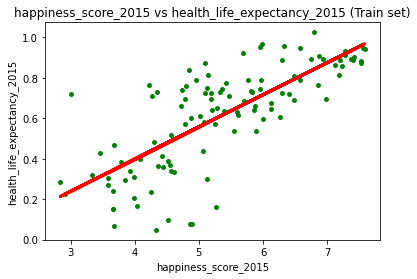

In [68]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs health_life_expectancy_2015 (Train set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('health_life_expectancy_2015')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04d. Data Preparation for Regression Analysis - 2015 Data

### happiness_score_2015 vs freedom_2015

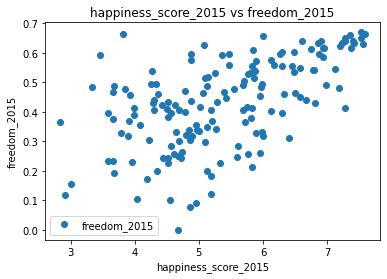

In [69]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2015.plot(x = 'happiness_score_2015', y='freedom_2015',style='o')
plt.title('happiness_score_2015 vs freedom_2015')  
plt.xlabel('happiness_score_2015')  
plt.ylabel('freedom_2015')  
plt.show()

In [70]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2015['happiness_score_2015'].values.reshape(-1,1)
y = df_2015['freedom_2015'].values.reshape(-1,1)

In [71]:
X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [72]:
y

array([[0.66557],
       [0.62877],
       [0.64938],
       [0.66973],
       [0.63297],
       [0.64169],
       [0.61576],
       [0.6598 ],
       [0.63938],
       [0.65124],
       [0.41319],
       [0.63376],
       [0.62433],
       [0.48181],
       [0.54604],
       [0.49049],
       [0.61583],
       [0.61777],
       [0.5845 ],
       [0.64157],
       [0.59625],
       [0.63274],
       [0.42908],
       [0.54252],
       [0.5421 ],
       [0.61477],
       [0.44132],
       [0.6404 ],
       [0.55011],
       [0.44974],
       [0.46364],
       [0.60362],
       [0.53466],
       [0.55664],
       [0.31048],
       [0.45951],
       [0.60365],
       [0.3974 ],
       [0.55499],
       [0.59657],
       [0.55884],
       [0.4035 ],
       [0.57733],
       [0.65821],
       [0.31751],
       [0.49615],
       [0.33208],
       [0.48574],
       [0.45492],
       [0.26236],
       [0.57414],
       [0.32818],
       [0.53899],
       [0.51649],
       [0.60855],
       [0.

In [73]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05d. Regression Analysis - 2015 Data

### happiness_score_2015 vs freedom_2015

In [74]:
# create a regression object

regression = LinearRegression()

In [75]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [76]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

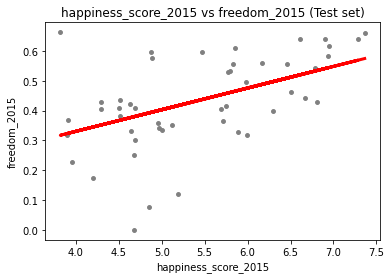

In [77]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs freedom_2015 (Test set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('freedom_2015')
plot_test.show()

In [78]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [79]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.07254172]]
Mean squared error:  0.017191096640529663
R2 score:  0.27654312169614126


The plot (test model) shows a positive relationship, so the coefficient is positive (0.072). The slope means that as happiness_score_2015 rises, as well as the freedom_2015 rises too. In this case, the MSE shows 0.017, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of freedom_2015 to happiness_score_2015. The R2 is 27.7 percent, which the data isn't fit that great.

In [80]:
y_predicted

array([[0.57467874],
       [0.47536913],
       [0.3765673 ],
       [0.36793484],
       [0.45512999],
       [0.36742704],
       [0.36778975],
       [0.32745656],
       [0.38041201],
       [0.40369791],
       [0.53274963],
       [0.32368439],
       [0.52433479],
       [0.45904724],
       [0.41726321],
       [0.39484782],
       [0.35219328],
       [0.39419494],
       [0.32310405],
       [0.46325466],
       [0.47478879],
       [0.50873832],
       [0.46057061],
       [0.56902049],
       [0.48791884],
       [0.49734927],
       [0.39281665],
       [0.54109193],
       [0.31751834],
       [0.38099235],
       [0.4676797 ],
       [0.46470549],
       [0.5443563 ],
       [0.35183057],
       [0.34472149],
       [0.53449063],
       [0.4010864 ],
       [0.45317136],
       [0.37722018],
       [0.4002159 ],
       [0.52005483],
       [0.37975914],
       [0.3800493 ],
       [0.41218529],
       [0.54370343],
       [0.45788657],
       [0.5123654 ],
       [0.437

In [81]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.65980,0.574679
1,0.31751,0.475369
2,0.42342,0.376567
3,0.38282,0.367935
4,0.36679,0.455130
5,0.40840,0.367427
6,0.43450,0.367790
7,0.22917,0.327457
8,0.30033,0.380412
9,0.33457,0.403698


In [82]:
# predict

y_predicted_train = regression.predict(X_train) 

In [83]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [84]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.07254172]]
Mean squared error:  0.01445927314345045
R2 score:  0.344001234054483


The plot (train model) shows a positive relationship, so the coefficient is positive (0.072). The slope means that as happiness_score_2015 rises, as well as the freedom_2015 rises too. In this case, the MSE shows 0.014, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of freedom_2015 to happiness_score_2015. The R2 is 34.4 percent, which the data isn't fit that great.

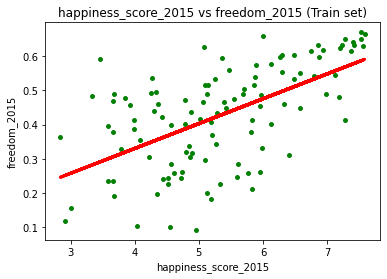

In [85]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs freedom_2015 (Train set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('freedom_2015')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04e. Data Preparation for Regression Analysis - 2015 Data

### happiness_score_2015 vs trust_2015

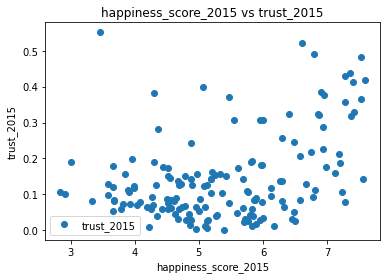

In [86]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2015.plot(x = 'happiness_score_2015', y='trust_2015',style='o')
plt.title('happiness_score_2015 vs trust_2015')  
plt.xlabel('happiness_score_2015')  
plt.ylabel('trust_2015')  
plt.show()

In [87]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2015['happiness_score_2015'].values.reshape(-1,1)
y = df_2015['trust_2015'].values.reshape(-1,1)

In [88]:
X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [89]:
y

array([[0.41978],
       [0.14145],
       [0.48357],
       [0.36503],
       [0.32957],
       [0.41372],
       [0.31814],
       [0.43844],
       [0.42922],
       [0.35637],
       [0.07785],
       [0.10583],
       [0.18676],
       [0.21312],
       [0.1589 ],
       [0.17521],
       [0.37798],
       [0.28703],
       [0.2254 ],
       [0.38583],
       [0.32067],
       [0.32524],
       [0.11069],
       [0.4921 ],
       [0.0927 ],
       [0.21843],
       [0.12869],
       [0.52208],
       [0.20646],
       [0.08484],
       [0.02652],
       [0.24558],
       [0.0512 ],
       [0.03187],
       [0.32524],
       [0.06398],
       [0.13586],
       [0.08129],
       [0.25609],
       [0.13633],
       [0.0114 ],
       [0.11776],
       [0.09472],
       [0.30826],
       [0.03431],
       [0.1806 ],
       [0.07857],
       [0.1809 ],
       [0.306  ],
       [0.02901],
       [0.088  ],
       [0.01615],
       [0.08242],
       [0.08454],
       [0.03787],
       [0.

In [90]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05e. Regression Analysis - 2015 Data

### happiness_score_2015 vs trust_2015¶

In [91]:
# create a regression object

regression = LinearRegression()

In [92]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [93]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

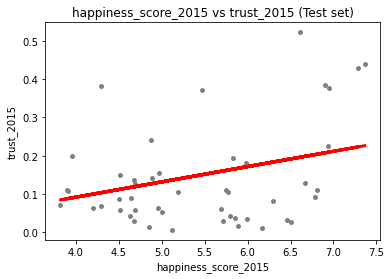

In [94]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs trust_2015 (Test set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('trust_2015')
plot_test.show()

In [95]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [96]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03986115]]
Mean squared error:  0.014542348563681197
R2 score:  0.1217011831017415


The plot (test model) shows a positive relationship, so the coefficient is positive (0.040). The slope means that as happiness_score_2015 rises, as well as the trust_2015 rises too. In this case, the MSE shows 0.015, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of trust_2015 to happiness_score_2015. The R2 is 12.1 percent, which the data fit very poor.

In [97]:
y_predicted

array([[0.22628977],
       [0.17171986],
       [0.11742898],
       [0.1126855 ],
       [0.1605986 ],
       [0.11240647],
       [0.11260578],
       [0.09044298],
       [0.11954162],
       [0.13233704],
       [0.20325003],
       [0.0883702 ],
       [0.19862613],
       [0.1627511 ],
       [0.13979108],
       [0.12747398],
       [0.10403563],
       [0.12711523],
       [0.08805131],
       [0.16506305],
       [0.17140097],
       [0.19005599],
       [0.16358818],
       [0.2231806 ],
       [0.17861584],
       [0.18379779],
       [0.12635787],
       [0.20783406],
       [0.084982  ],
       [0.11986051],
       [0.16749458],
       [0.16586027],
       [0.20962781],
       [0.10383632],
       [0.09992993],
       [0.20420669],
       [0.13090204],
       [0.15952235],
       [0.11778773],
       [0.13042371],
       [0.19627433],
       [0.11918287],
       [0.11934231],
       [0.1370008 ],
       [0.20926906],
       [0.16211332],
       [0.19204904],
       [0.150

In [98]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.43844,0.226290
1,0.03431,0.171720
2,0.04355,0.117429
3,0.05907,0.112685
4,0.03005,0.160599
5,0.08786,0.112406
6,0.15048,0.112606
7,0.19900,0.090443
8,0.05863,0.119542
9,0.05327,0.132337


In [99]:
# predict

y_predicted_train = regression.predict(X_train) 

In [100]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [101]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03986115]]
Mean squared error:  0.01103021805538018
R2 score:  0.171883655733431


The plot (train model) shows a positive relationship, so the coefficient is positive (0.040). The slope means that as happiness_score_2015 rises, as well as the trust_2015 rises too. In this case, the MSE shows 0.011, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of trust_2015 to happiness_score_2015. The R2 is 17.2 percent, which the data fit very poor.

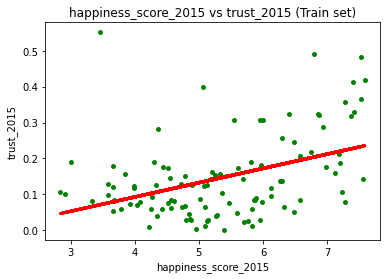

In [102]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs trust_2015 (Train set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('trust_2015')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04f. Data Preparation for Regression Analysis - 2015 Data


### happiness_score_2015 vs generosity_2015

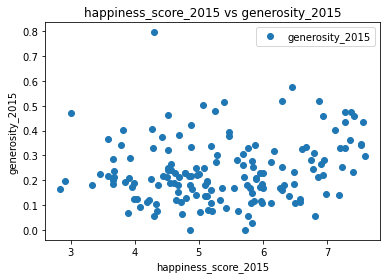

In [103]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2015.plot(x = 'happiness_score_2015', y='generosity_2015',style='o')
plt.title('happiness_score_2015 vs generosity_2015')  
plt.xlabel('happiness_score_2015')  
plt.ylabel('generosity_2015')  
plt.show()

In [104]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2015['happiness_score_2015'].values.reshape(-1,1)
y = df_2015['generosity_2015'].values.reshape(-1,1)

In [105]:
X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [106]:
y

array([[0.29678],
       [0.4363 ],
       [0.34139],
       [0.34699],
       [0.45811],
       [0.23351],
       [0.4761 ],
       [0.36262],
       [0.47501],
       [0.43562],
       [0.33172],
       [0.25497],
       [0.33088],
       [0.14074],
       [0.40105],
       [0.14574],
       [0.28034],
       [0.45901],
       [0.2225 ],
       [0.26428],
       [0.51912],
       [0.21542],
       [0.05841],
       [0.31105],
       [0.24434],
       [0.28214],
       [0.33363],
       [0.32573],
       [0.12332],
       [0.11451],
       [0.10686],
       [0.2324 ],
       [0.18401],
       [0.5763 ],
       [0.13706],
       [0.18227],
       [0.51752],
       [0.25376],
       [0.16228],
       [0.16991],
       [0.31844],
       [0.10692],
       [0.27489],
       [0.22837],
       [0.16893],
       [0.10705],
       [0.18557],
       [0.11541],
       [0.17362],
       [0.22823],
       [0.20536],
       [0.20951],
       [0.3424 ],
       [0.11827],
       [0.25328],
       [0.

In [107]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05f. Regression Analysis - 2015 Data

### happiness_score_2015 vs generosity_2015

In [110]:
# create a regression object

regression = LinearRegression()

In [111]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [112]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

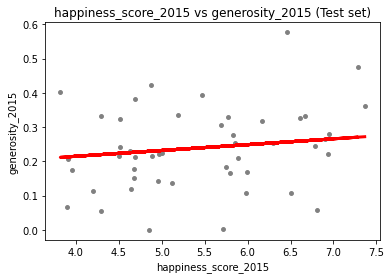

In [113]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs generosity_2015 (Test set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('generosity_2015')
plot_test.show()

In [114]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [115]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01695951]]
Mean squared error:  0.01346584402209691
R2 score:  0.050335811175594825


The plot (test model) shows a positive relationship, so the coefficient is positive (0.016). The slope means that as happiness_score_2015 rises, as well as the generosity_2015 rises too. In this case, the MSE shows 0.0134, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of generosity_2015 to happiness_score_2015. The R2 is 5 percent, which the data fit very poor.

In [116]:
y_predicted

array([[0.27199925],
       [0.24878168],
       [0.22568282],
       [0.22366464],
       [0.24404997],
       [0.22354592],
       [0.22363072],
       [0.21420123],
       [0.22658168],
       [0.23202568],
       [0.26219665],
       [0.21331934],
       [0.26022935],
       [0.24496579],
       [0.23519711],
       [0.22995662],
       [0.21998443],
       [0.22980398],
       [0.21318366],
       [0.24594944],
       [0.248646  ],
       [0.25658305],
       [0.24532194],
       [0.27067641],
       [0.25171567],
       [0.25392041],
       [0.22948175],
       [0.264147  ],
       [0.21187778],
       [0.22671735],
       [0.24698397],
       [0.24628863],
       [0.26491017],
       [0.21989963],
       [0.2182376 ],
       [0.26260368],
       [0.23141514],
       [0.24359207],
       [0.22583546],
       [0.23121162],
       [0.25922874],
       [0.22642904],
       [0.22649688],
       [0.23400994],
       [0.26475754],
       [0.24469444],
       [0.25743103],
       [0.239

In [117]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.36262,0.271999
1,0.16893,0.248782
2,0.23087,0.225683
3,0.32296,0.223665
4,0.00199,0.244050
5,0.21488,0.223546
6,0.24325,0.223631
7,0.17441,0.214201
8,0.38086,0.226582
9,0.22359,0.232026


In [118]:
# predict

y_predicted_train = regression.predict(X_train) 

In [119]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [120]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01695951]]
Mean squared error:  0.01630373346545232
R2 score:  0.024789386852934525


The plot (train model) shows a positive relationship, so the coefficient is positive (0.016). The slope means that as happiness_score_2015 rises, as well as the generosity_2015 rises too. In this case, the MSE shows 0.0163, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of generosity_2015 to happiness_score_2015. The R2 is 2.5 percent, which the data fit very poor.

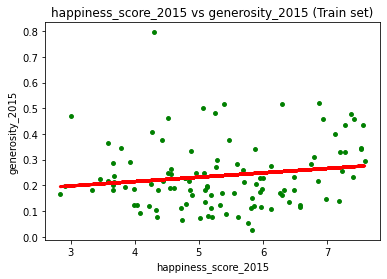

In [121]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs generosity_2015 (Train set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('generosity_2015')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the train set; The R2 is higher in test set compared to train set.

# 04g. Data Preparation for Regression Analysis - 2015 Data

### happiness_score_2015 vs dystopia_residual_2015

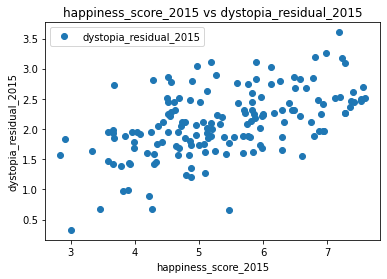

In [122]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2015.plot(x = 'happiness_score_2015', y='dystopia_residual_2015',style='o')
plt.title('happiness_score_2015 vs dystopia_residual_2015')  
plt.xlabel('happiness_score_2015')  
plt.ylabel('dystopia_residual_2015')  
plt.show()

In [123]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2015['happiness_score_2015'].values.reshape(-1,1)
y = df_2015['dystopia_residual_2015'].values.reshape(-1,1)

In [124]:
X

array([[7.587],
       [7.561],
       [7.527],
       [7.522],
       [7.427],
       [7.406],
       [7.378],
       [7.364],
       [7.286],
       [7.284],
       [7.278],
       [7.226],
       [7.2  ],
       [7.187],
       [7.119],
       [6.983],
       [6.946],
       [6.94 ],
       [6.937],
       [6.901],
       [6.867],
       [6.853],
       [6.81 ],
       [6.798],
       [6.786],
       [6.75 ],
       [6.67 ],
       [6.611],
       [6.575],
       [6.574],
       [6.505],
       [6.485],
       [6.477],
       [6.455],
       [6.411],
       [6.329],
       [6.302],
       [6.298],
       [6.295],
       [6.269],
       [6.168],
       [6.13 ],
       [6.123],
       [6.003],
       [5.995],
       [5.987],
       [5.984],
       [5.975],
       [5.96 ],
       [5.948],
       [5.89 ],
       [5.889],
       [5.878],
       [5.855],
       [5.848],
       [5.833],
       [5.828],
       [5.824],
       [5.813],
       [5.791],
       [5.77 ],
       [5.759],
       [

In [125]:
y

array([[2.51738],
       [2.70201],
       [2.49204],
       [2.46531],
       [2.45176],
       [2.61955],
       [2.4657 ],
       [2.37119],
       [2.26425],
       [2.26646],
       [3.08854],
       [3.17728],
       [2.5332 ],
       [3.60214],
       [2.51011],
       [3.26001],
       [1.96961],
       [1.9757 ],
       [2.41484],
       [2.24743],
       [1.96994],
       [2.47489],
       [3.19131],
       [1.88501],
       [2.84848],
       [2.11569],
       [2.67585],
       [1.55674],
       [2.21126],
       [2.836  ],
       [2.67782],
       [2.32142],
       [2.85737],
       [2.31945],
       [2.43872],
       [2.12367],
       [1.6488 ],
       [2.32323],
       [1.87634],
       [2.79094],
       [2.26882],
       [3.035  ],
       [2.74255],
       [2.23741],
       [2.24639],
       [1.68435],
       [2.21978],
       [2.53942],
       [1.73797],
       [2.02518],
       [2.82334],
       [3.10712],
       [2.18896],
       [2.24729],
       [1.61583],
       [2.

In [126]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05g. Regression Analysis - 2015 Data

### happiness_score_2015 vs dystopia_residual_2015

In [127]:
# create a regression object

regression = LinearRegression()

In [128]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [129]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

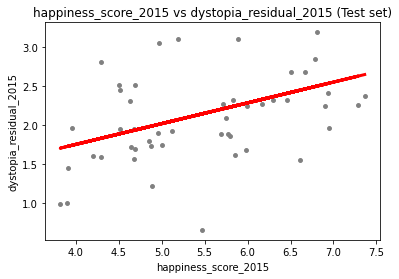

In [130]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs dystopia_residual_2015 (Test set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('dystopia_residual_2015')
plot_test.show()

In [131]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [132]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.26639548]]
Mean squared error:  0.2673868622491516
R2 score:  0.14282266834218538


The plot (test model) shows a positive relationship, so the coefficient is positive (0.027). The slope means that as happiness_score_2015 rises, as well as the dystopia_residual_2015 rises too. In this case, the MSE shows 0.267, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of dystopia_residual_2015 to happiness_score_2015. The R2 is 14.2 percent, which the data doesn't fit great.

In [133]:
y_predicted

array([[2.64951594],
       [2.28482052],
       [1.92198987],
       [1.89028881],
       [2.21049618],
       [1.88842404],
       [1.88975602],
       [1.74164013],
       [1.93610883],
       [2.02162178],
       [2.49553935],
       [1.72778757],
       [2.46463747],
       [2.22488154],
       [2.07143774],
       [1.98912154],
       [1.83248099],
       [1.98672398],
       [1.7256564 ],
       [2.24033248],
       [2.28268936],
       [2.40736244],
       [2.23047584],
       [2.62873709],
       [2.33090694],
       [2.36553835],
       [1.98166246],
       [2.52617483],
       [1.70514395],
       [1.93824   ],
       [2.2565826 ],
       [2.24566039],
       [2.53816262],
       [1.83114901],
       [1.80504226],
       [2.50193284],
       [2.01203155],
       [2.2033035 ],
       [1.92438743],
       [2.0088348 ],
       [2.44892014],
       [1.93371128],
       [1.93477686],
       [2.05279006],
       [2.53576507],
       [2.22061921],
       [2.42068222],
       [2.146

In [134]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.37119,2.649516
1,2.24639,2.284821
2,2.30919,1.921990
3,1.95637,1.890289
4,2.27394,2.210496
5,2.51009,1.888424
6,2.44876,1.889756
7,1.95812,1.741640
8,1.69440,1.936109
9,1.73933,2.021622


In [135]:
# predict

y_predicted_train = regression.predict(X_train) 

In [136]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [137]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.26639548]]
Mean squared error:  0.19840528129365392
R2 score:  0.3400998463244378


The plot (train model) shows a positive relationship, so the coefficient is positive (0.027). The slope means that as happiness_score_2015 rises, as well as the dystopia_residual_2015 rises too. In this case, the MSE shows 0.198, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of dystopia_residual_2015 to happiness_score_2015. The R2 is 34 percent, which the data doesn't fit great.

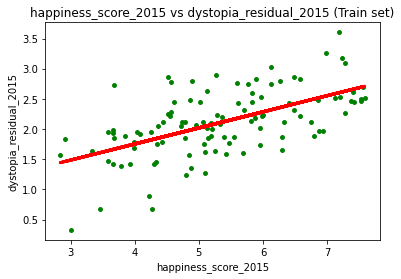

In [138]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2015 vs dystopia_residual_2015 (Train set)')
plot_test.xlabel('happiness_score_2015')
plot_test.ylabel('dystopia_residual_2015')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.